<img src = "https://storage.googleapis.com/kaggle-datasets-images/6012/1733506/0a5af086168a9b87a38b29bac75aa8ce/dataset-cover.jpg?t=2020-12-11-10-57-11">

# 1. Introduction

**Final Project 2**<br>


1. Putu Wahyu Kusuma Wardhana<br>
PYTN-KS05-001

## a. Project Overview

Database ini memiliki 23 atribut. Dengan data hujan harian selama 10 tahun di Australia,
kolom RainTomorrow adalah target variable yang mau kita prediksi. Jika “Yes” maka
besok harinya disana hujan 1mm atau lebih.

Attribute Information:
1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediksi

## b. Research Goal

Melakukan klasifikasi untuk melakukan prediksi apakah besok harinya hujan atau tidak.

# 2. Import Library

In [221]:
import pandas as pd
import numpy as np # linear algebra

import missingno as msn

# import libraries for plotting
from matplotlib import pylab
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.utils import resample

# 3. Load Dataset

In [160]:
df = pd.read_csv('datasets/weatherAUS.csv')
pd.set_option('display.max_columns',None)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [161]:
# View Dataset

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [162]:
# Dimensions of dataset 

df.shape

(145460, 23)

Dapat kita lihat, terdapat 145460 baris and 23 fitur / kolom pada dataset.

In [163]:
# Info Dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Berdasarkan info diatas, terdapat beberapa hal yang didapatkan yaitu : 

- Dataset ini memiliki dua jenis tipe data, Categorical ( type object ) dan Numerical ( type float64 ).
- Masih ada missing values pada fitur.

<AxesSubplot:>

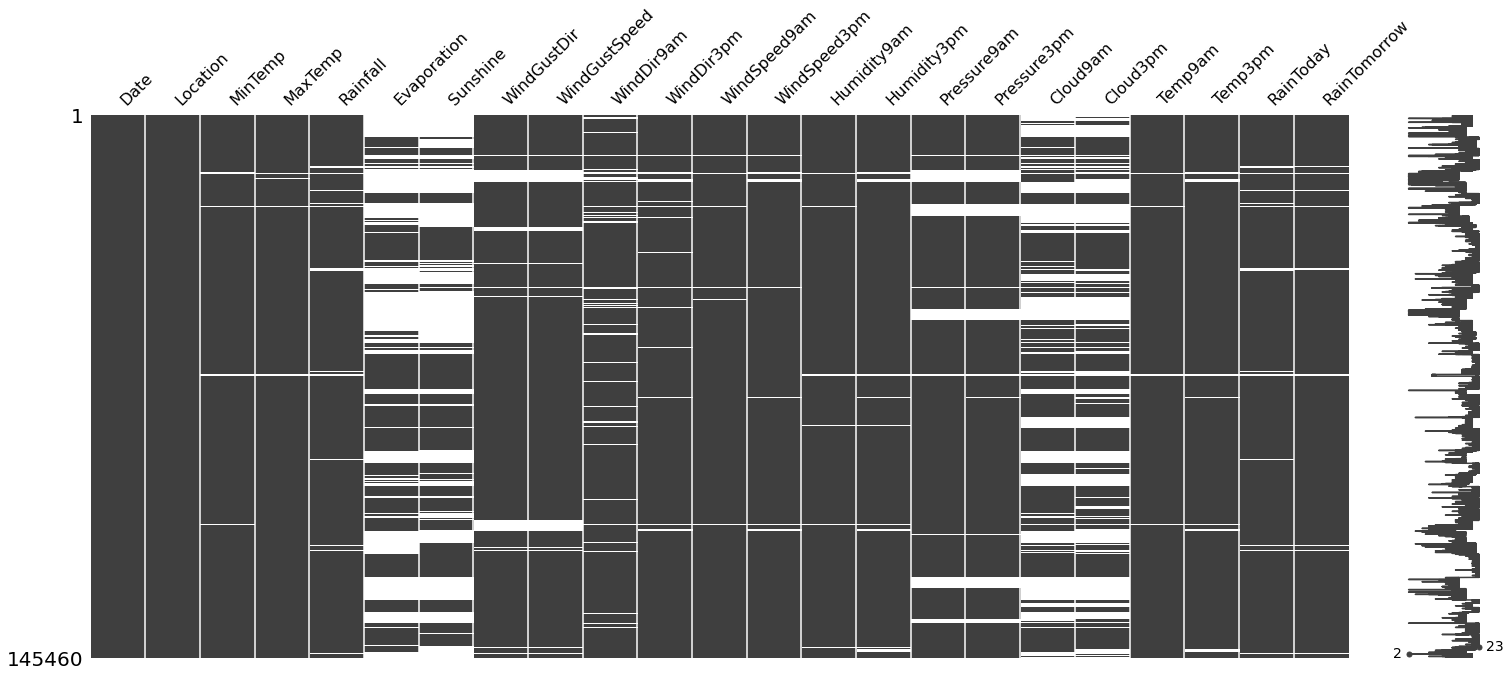

In [164]:
# Checking missing values

msn.matrix(df)

In [165]:
missing = pd.DataFrame(df.isnull().sum(),columns = ['no.of missing values'])

missing['% missing_values']= (missing/len(df)).round(2)*100
missing

,no.of missing values,% missing_values
Date,0,0.0
Location,0,0.0
MinTemp,1485,1.0
MaxTemp,1261,1.0
Rainfall,3261,2.0
Evaporation,62790,43.0
Sunshine,69835,48.0
WindGustDir,10326,7.0
WindGustSpeed,10263,7.0
WindDir9am,10566,7.0


Berdasarkan visualisasi dan output missing values, pada kolom 'Evaporation', 'Sunshine', 'Cloud9am', dan 'Cloud3am' memiliki jumlah missing value yang cukup banyak. Keempat fitur ini kemungkinan memang harus bernilai Nan karena memiliki persentase hampir 50%, sehingga dilakukan penghapusan terhadap kolom.

# 4. Data Cleaning

## a. Filling Missing Values
Tahapan ini dilakukan berdasarkan info pada missing values, yang berfungsi untuk mengisi fitur yang masih terdapat missing values dengan method "forward fill".

In [166]:
df = df.fillna(method="ffill")

<AxesSubplot:>

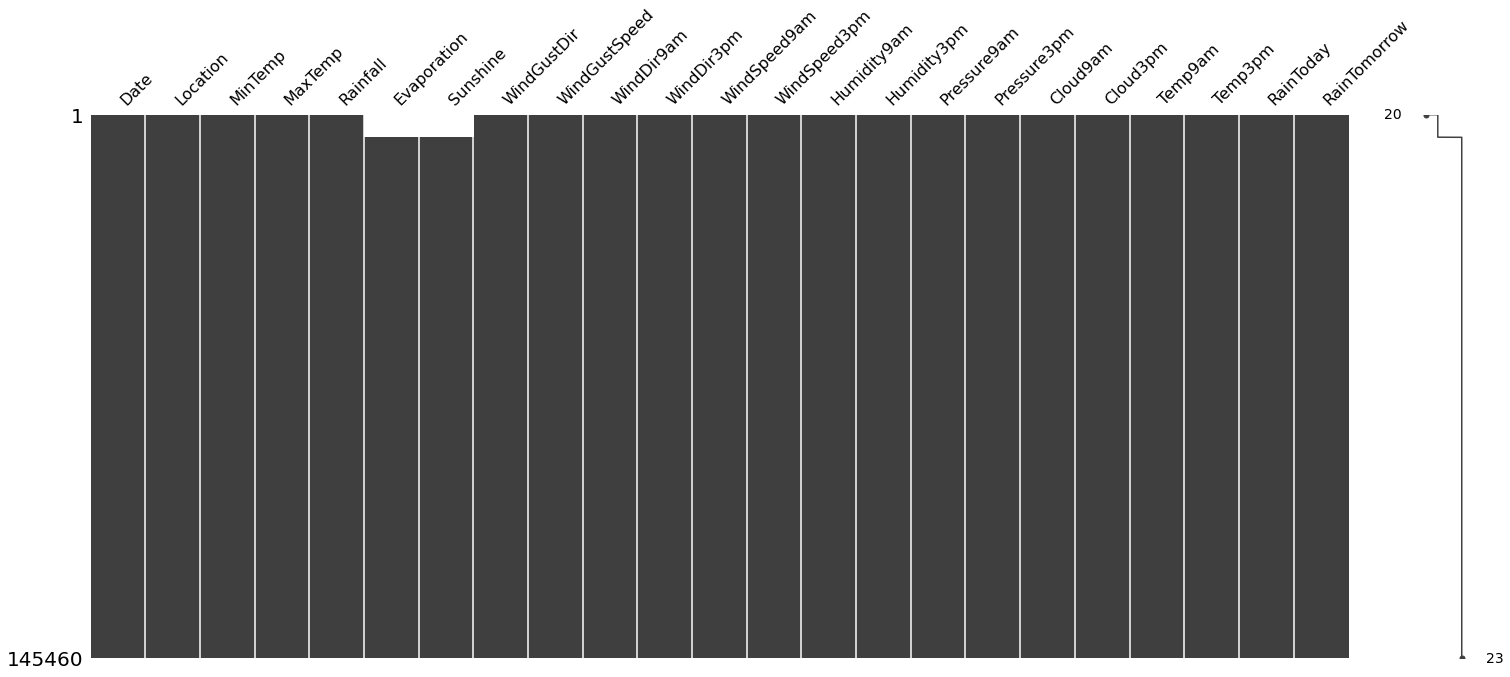

In [167]:
msn.matrix(df)

In [168]:
df.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation      6049
Sunshine         6049
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            2
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
dtype: int64

## b. Drop terhadap Fitur
Pada tahap ini kami melakukan drop terhadap fitur yang masih memiliki missing values ('Evaporation','Sunshine','Cloud9am','Cloud3pm'). Fitur 'Cloud9am' ikut didrop karena menurut kami fitur berpasangan dengan 'Cloud3pm'

In [169]:
df = df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


# 5. EDA (Exploratory Data Analysis)

## a. Numerical

**Statistik Deskriptif**
<br>
Tahap ini dilakukan untuk mendapatkan ringkasan dari statistik, seperti jumlah data, rata-rata, simpangan baku, nilai minimum dan maksimum, dan kuartil data. Dari info count (jumlah), juga bisa diketahui ketika masih terdapat missing value.

In [170]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.212171,23.219744,2.380949,39.456091,14.049093,18.852138,68.903712,51.466211,1017.885191,1015.530515,16.972662,21.685365
std,6.395051,7.111631,8.488905,13.626488,8.922410,9.064764,19.192705,20.882041,6.965712,6.868598,6.502089,6.953477
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,30.000000,7.000000,13.000000,57.000000,36.000000,1013.500000,1011.000000,12.300000,16.600000
50%,12.000000,22.700000,0.000000,37.000000,13.000000,19.000000,70.000000,52.000000,1018.000000,1015.600000,16.700000,21.200000
75%,16.900000,28.200000,0.800000,46.000000,19.000000,24.000000,83.000000,66.000000,1022.300000,1019.900000,21.500000,26.400000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000


**Extract fitur numerical**

In [171]:
num_col = df.select_dtypes(include=np.number).columns.to_list()
len(num_col)

12

Hal ini berarti terdapat 12 fitur dengan tipe numerical pada dataset.

**Visualisasi**

C:\Users\WAHYU\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\WAHYU\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\WAHYU\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\WAHYU\Anaconda3\lib\site-

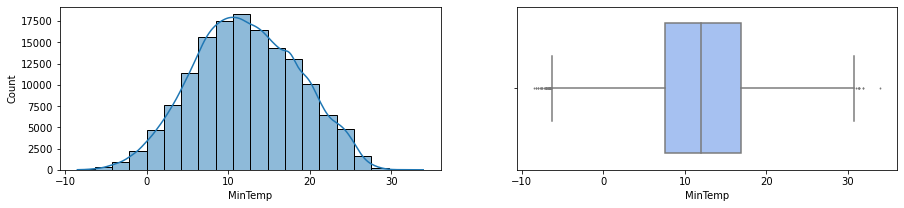

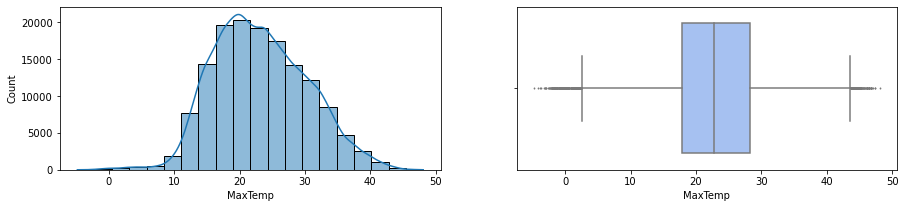

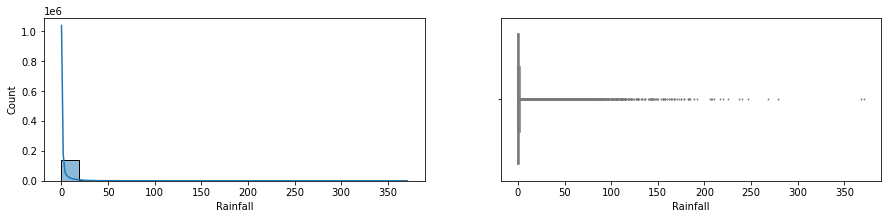

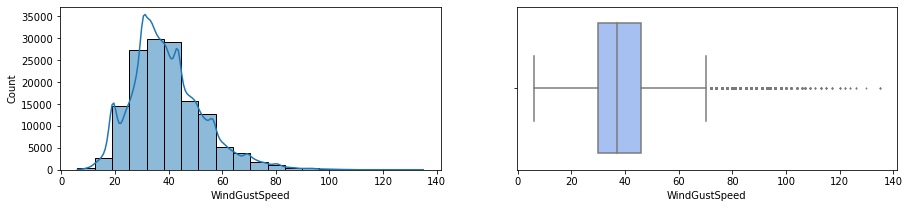

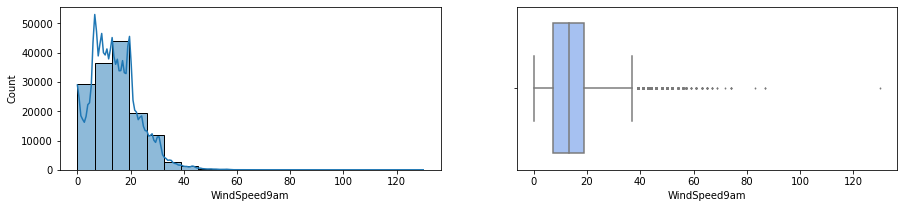

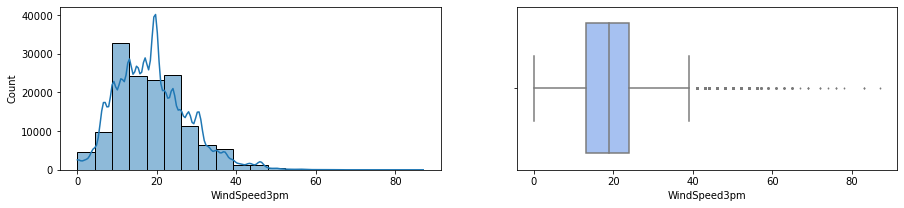

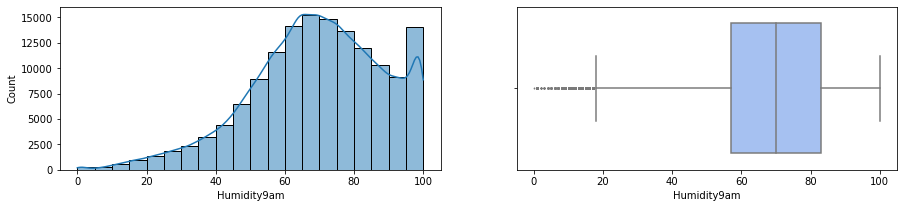

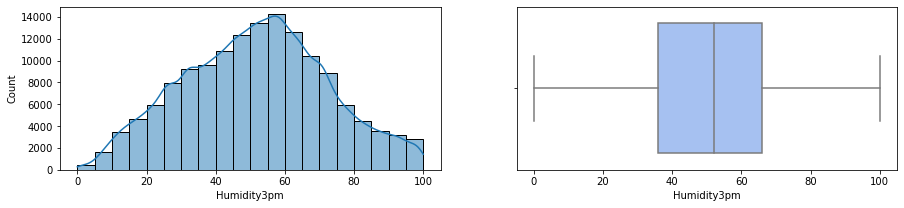

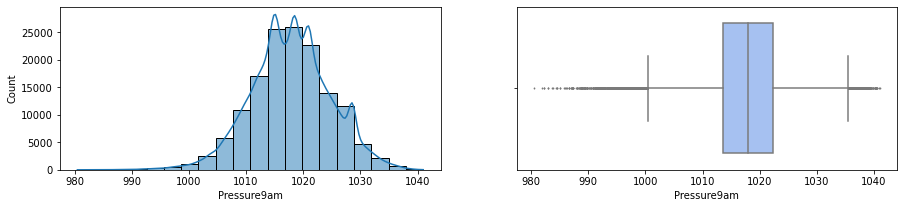

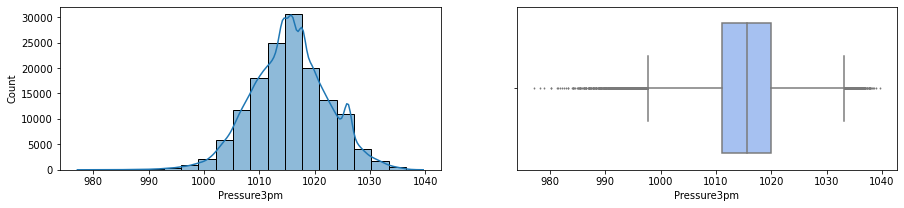

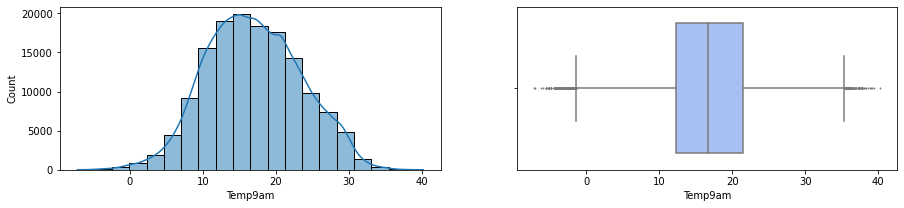

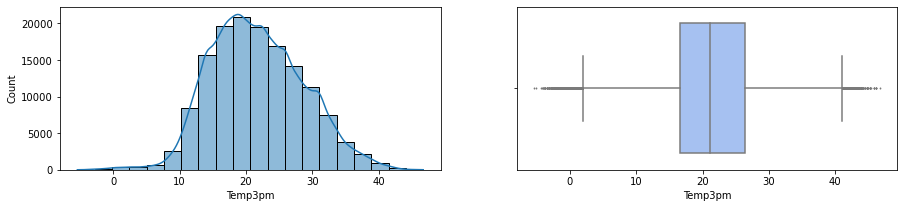

In [172]:
for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(df[i], ax = axs[1], color='#99befd', fliersize=1);

Dari visualisasi diatas, fitur "Rainfall" memiliki distorasi yang besar dan outlier atau pencilan yang banyak juga. Sedangkan untuk fitur selain rainfall, fitur sudah memiliki persebaran data yang bagus walaupun dengan outlier. 

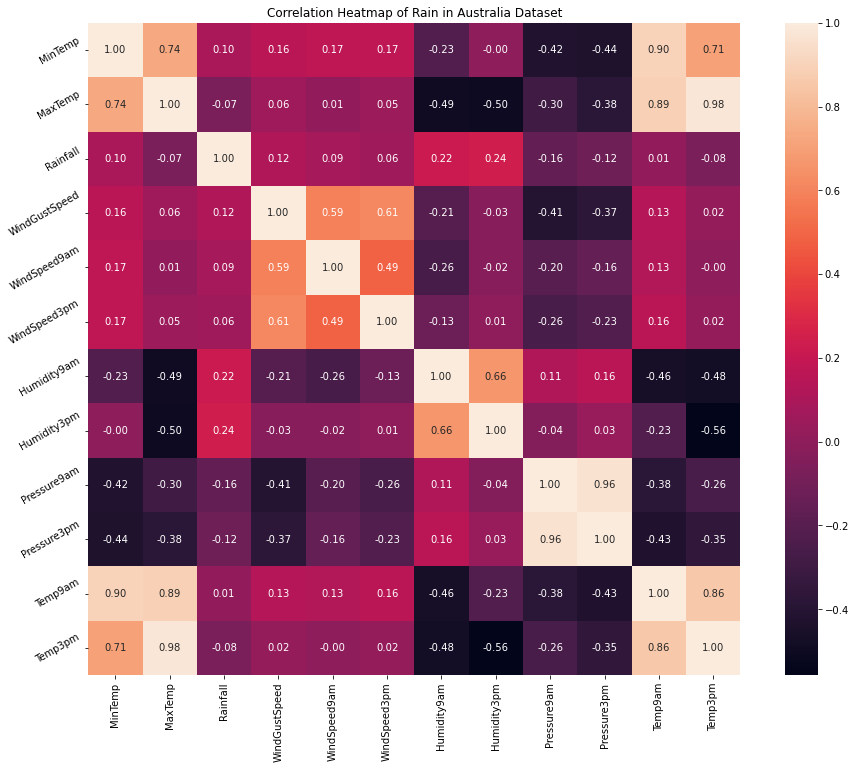

In [173]:
correlation = df.corr()

plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

Dari heat map di atas, didapatkan beberapa info bahwa :

- Variabel MinTemp dan MaxTemp berkorelasi kuat (koefisien korelasi = 0,74).

- Variabel MinTemp dan Temp3pm berkorelasi kuat (koefisien korelasi = 0,71).

- Variabel MinTemp dan Temp9am berkorelasi sangat kuat (koefisien korelasi = 0,90).

- Variabel MaxTemp dan Temp9am berkorelasi sangat kuat (koefisien korelasi = 0,89).

- Variabel MaxTemp dan Temp3pm juga berkorelasi sangat kuat (koefisien korelasi = 0,98).

- Variabel WindGustSpeed dan WindSpeed3pm berkorelasi kuat (koefisien korelasi = 0,69).

- Variabel Pressure9am dan Pressure3pm berkorelasi sangat kuat (koefisien korelasi = 0,96).

- Variabel Temp9am dan Temp3pm berkorelasi sangat kuat (koefisien korelasi = 0,86).

Selain itu, pada heatmap ini juga bisa didapatkan info bahwa fitur "Rainfall" memiliki korelasi yang paling lemah dengan semua fitur numerical lainnya.

## b. Categorical

**Info**

In [174]:
categorical= df.select_dtypes(include=['object'])
categorical.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


- Terdapat variabel tanggal, dilambangkan dengan kolom Date

- Terdapat 7 fitur dengan tipe categorical, yaitu : Date, Location, WindGustDir, WindDir9am, WindDir3pm, RainToday and RainTomorrow.

- Terdapat dua fitur binary categorical - RainToday dan RainTomorrow

- RainTomorrow adalah fitur target.

**Explore dan Visualisasi terhadap Fitur**

Location

In [175]:
categorical['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [176]:
categorical['Location'].value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


Berdasarkan info diatas, tiga lokasi terbanyak untuk survey dataset hujan terdapat di Canberra, Sydney, dan Darwin              

WindGustDir

In [177]:
categorical['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

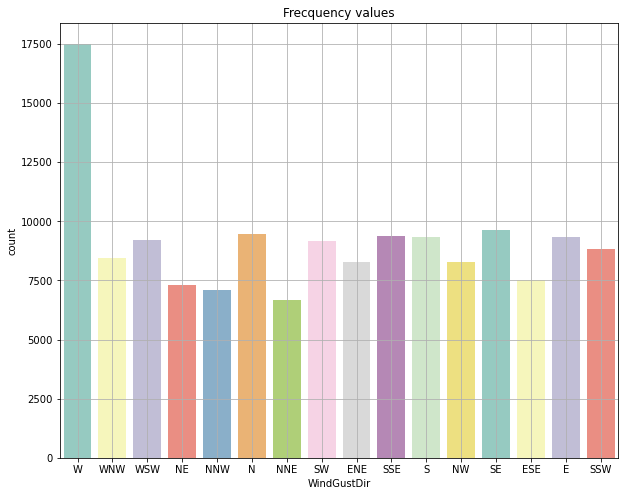

In [178]:
plt.ax = plt.subplots(figsize=(10,8))
ax=sns.countplot(x='WindGustDir',data=categorical,palette="Set3")
plt.grid()
plt.title('Frecquency values');

Dari visualisasi diatas, fitur "WindGustDir" memiliki nilai W paling banyak.

WindDir9am

In [179]:
categorical['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'SSW', 'N', 'WSW',
       'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

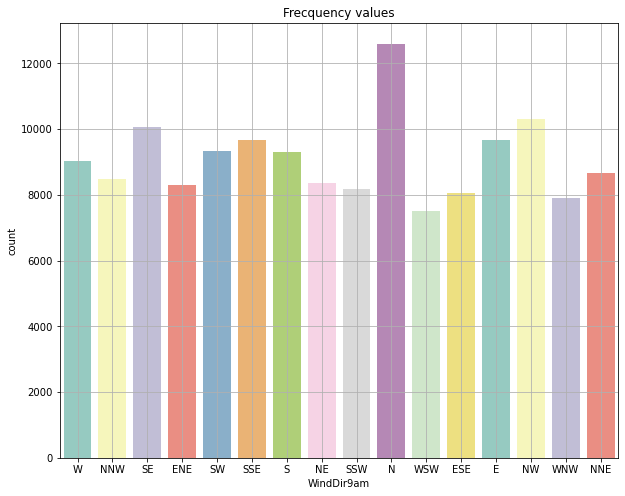

In [180]:
plt.ax = plt.subplots(figsize=(10,8))
ax=sns.countplot(x='WindDir9am',data=categorical,palette="Set3")
plt.grid()
plt.title('Frecquency values');

Dari visualisasi diatas, fitur "WindDir9am" memiliki nilai N paling banyak.

WindDir3pm

In [181]:
categorical['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', 'NE'], dtype=object)

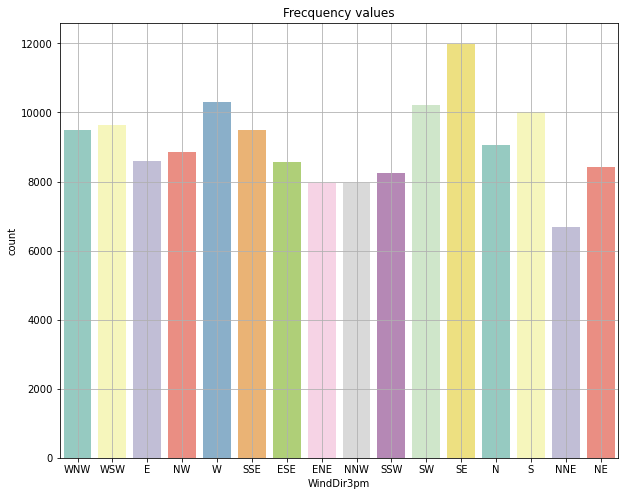

In [182]:
plt.ax = plt.subplots(figsize=(10,8))
ax=sns.countplot(x='WindDir3pm',data=categorical,palette="Set3")
plt.grid()
plt.title('Frecquency values');

Dari visualisasi diatas, fitur "WindDir3pm" memiliki nilai SE paling banyak.

RainToday dan Rain Tomorrow

In [183]:
categorical['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

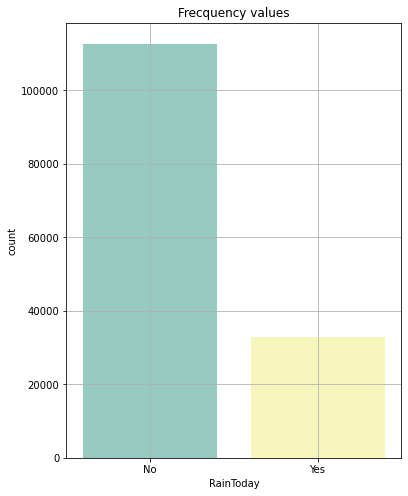

In [184]:
plt.ax = plt.subplots(figsize=(6,8))
ax=sns.countplot(x='RainToday',data=categorical,palette="Set3")
plt.grid()
plt.title('Frecquency values');

In [185]:
categorical['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

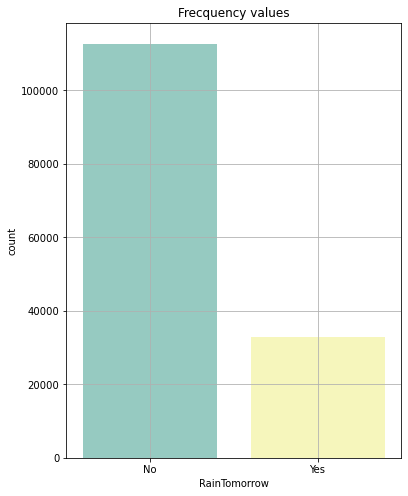

In [186]:
plt.ax = plt.subplots(figsize=(6,8))
ax=sns.countplot(x='RainTomorrow',data=categorical,palette="Set3")
plt.grid()
plt.title('Frecquency values');

Dari visualisasi fitur "RainToday" dan "RainTomorrow", kami mendapatkan info bahwa fitur ini termasuk imbalanced. Imbalanced ini adalah kasus khusus untuk masalah klasifikasi di mana distribusi kelas tidak seragam di antara kelas-kelas. Biasanya, mereka terdiri dari dua kelas: kelas mayoritas (negatif) dan kelas minoritas (positif).

# 6. Data Preprocessing

In [187]:
df2 = df.copy()

## a. Feature Engineering of Date

In [188]:
# parse the dates, currently coded as strings, into datetime format

df2['Date'] = pd.to_datetime(df2['Date'])

In [189]:
df2['Date']

0        2008-12-01
1        2008-12-02
2        2008-12-03
3        2008-12-04
4        2008-12-05
            ...    
145455   2017-06-21
145456   2017-06-22
145457   2017-06-23
145458   2017-06-24
145459   2017-06-25
Name: Date, Length: 145460, dtype: datetime64[ns]

In [190]:
# extract month from date

df2['Month'] = df2['Date'].dt.month

In [191]:
# extract day from date

df2['Day'] = df2['Date'].dt.day

In [192]:
df2.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,12,5


In [193]:
# drop the original Date variable

df2.drop(['Date'],axis=1,inplace=True)

## b. Encoding
Pada tahap ini, kami mengubah data dengan tipe categorical menjadi tipe numerical. Kami tidak menggunakan library "LabelEncoder" karena ingin mengetahui setiap nilai yang diubah, sehingga dapat mempermudah pada tahap deployment.

### RainToday dan RainTomorrow

In [194]:
dic = {'No':0 ,'Yes':1}

In [195]:
df2['RainToday'] = df2['RainToday'].map(dic)

In [196]:
df2['RainTomorrow'] = df2['RainTomorrow'].map(dic)

### WindGustDir

In [197]:
dic_WindGustDir = {'W':0, 'WNW':1, 'WSW':2, 'NE':3, 'NNW':4, 'N':5, 'NNE':6, 'SW':7, 'ENE':8, 'SSE':9,'S':10, 'NW':11, 'SE':12, 'ESE':13, 'E':14, 'SSW':15}

In [198]:
df2['WindGustDir']=df2['WindGustDir'].map(dic_WindGustDir)

### WindDir9am

In [199]:
df2['WindDir9am'] = df2['WindDir9am'].map(dic_WindGustDir)

### WindDir3pm

In [200]:
df2['WindDir3pm'] = df2['WindDir3pm'].map(dic_WindGustDir)

### Location

In [201]:
df_location = df2.groupby(['Location'])['RainTomorrow'].mean().sort_values(ascending=False)

In [202]:
df_location

Location
Walpole             0.366933
Portland            0.366235
Cairns              0.318421
NorfolkIsland       0.309737
Dartmoor            0.306414
MountGambier        0.303618
Albany              0.300000
Witchcliffe         0.297441
CoffsHarbour        0.291459
MountGinini         0.287500
Williamtown         0.285809
NorahHead           0.280626
Darwin              0.266834
GoldCoast           0.261842
Sydney              0.258672
Ballarat            0.258224
SydneyAirport       0.257893
Newcastle           0.251728
Watsonia            0.246594
Hobart              0.238334
Wollongong          0.238158
Melbourne           0.233949
Launceston          0.231250
Brisbane            0.223927
Adelaide            0.221422
MelbourneAirport    0.217016
Sale                0.214357
Albury              0.203947
Perth               0.202004
Penrith             0.201711
BadgerysCreek       0.199402
Nuriootpa           0.198072
Tuggeranong         0.189207
PerthAirport        0.188435
Richm

In [203]:
list_location = df_location.index

In [204]:
location_dic = {}
for index, val in enumerate(list_location):
    location_dic[val] = (48 - index)

In [205]:
location_dic

{'Walpole': 48,
 'Portland': 47,
 'Cairns': 46,
 'NorfolkIsland': 45,
 'Dartmoor': 44,
 'MountGambier': 43,
 'Albany': 42,
 'Witchcliffe': 41,
 'CoffsHarbour': 40,
 'MountGinini': 39,
 'Williamtown': 38,
 'NorahHead': 37,
 'Darwin': 36,
 'GoldCoast': 35,
 'Sydney': 34,
 'Ballarat': 33,
 'SydneyAirport': 32,
 'Newcastle': 31,
 'Watsonia': 30,
 'Hobart': 29,
 'Wollongong': 28,
 'Melbourne': 27,
 'Launceston': 26,
 'Brisbane': 25,
 'Adelaide': 24,
 'MelbourneAirport': 23,
 'Sale': 22,
 'Albury': 21,
 'Perth': 20,
 'Penrith': 19,
 'BadgerysCreek': 18,
 'Nuriootpa': 17,
 'Tuggeranong': 16,
 'PerthAirport': 15,
 'Richmond': 14,
 'PearceRAAF': 13,
 'Bendigo': 12,
 'Canberra': 11,
 'WaggaWagga': 10,
 'Katherine': 9,
 'Townsville': 8,
 'SalmonGums': 7,
 'Nhil': 6,
 'Moree': 5,
 'Cobar': 4,
 'Mildura': 3,
 'AliceSprings': 2,
 'Uluru': 1,
 'Woomera': 0}

In [206]:
df2['Location']= df2["Location"].map(location_dic)

In [207]:
df2.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day
0,21,13.4,22.9,0.6,0,44.0,0,1,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,12,1
1,21,7.4,25.1,0.0,1,44.0,4,2,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,12,2
2,21,12.9,25.7,0.0,2,46.0,0,2,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,12,3
3,21,9.2,28.0,0.0,3,24.0,12,14,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,12,4
4,21,17.5,32.3,1.0,0,41.0,8,11,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,12,5


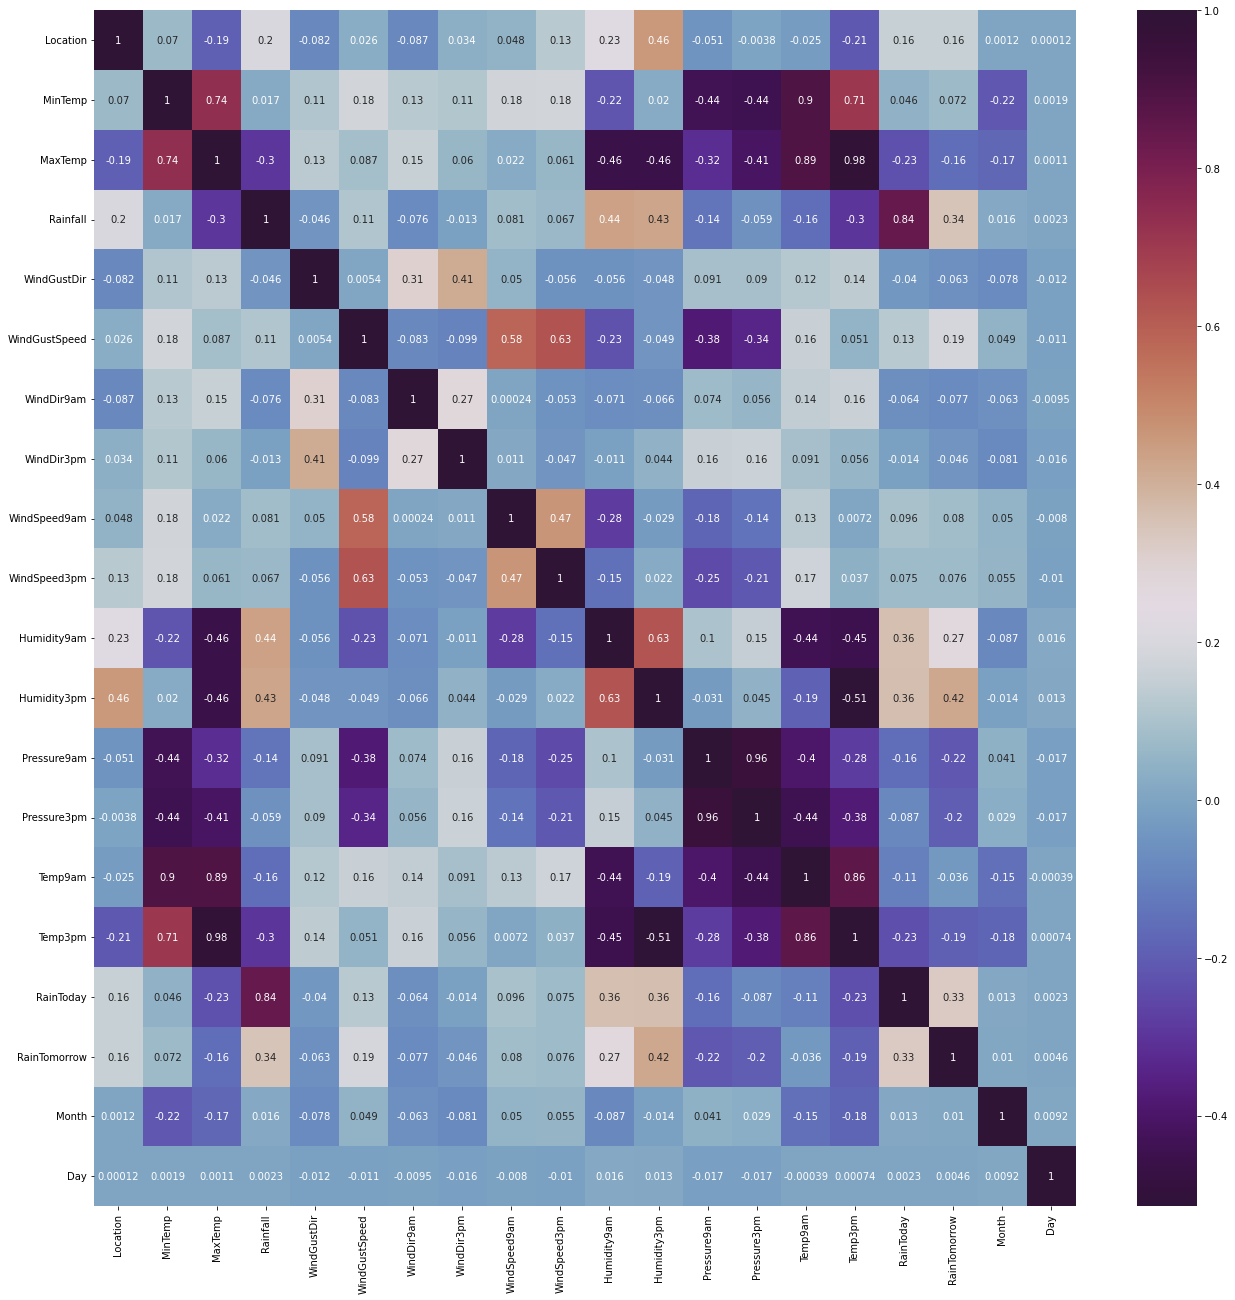

In [208]:
plt.figure(figsize=(22,22))
sns.heatmap(df2.corr(method = "spearman"),annot=True,cmap='twilight_shifted')
plt.show()

Dari heatmap diatas, kami menyimpulkan bahwa terdapat tiga fitur yang sangat berpengaruh terhadap terjadinya hujan pada keesokan harinya, yaitu : 
- Fitur "Humidity3pm" 
- Fitur "Rainfall"
- Fitur "RainToday" 

## c. Handling Outliers

In [209]:
features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features_with_outliers:
    q1 = df2[feature].quantile(0.25)
    q3 = df2[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df2.loc[df2[feature]<lower_limit,feature] = lower_limit
    df2.loc[df2[feature]>upper_limit,feature] = upper_limit

C:\Users\WAHYU\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\WAHYU\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\WAHYU\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\WAHYU\Anaconda3\lib\site-

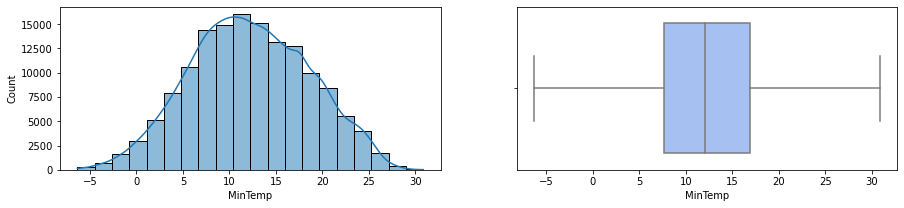

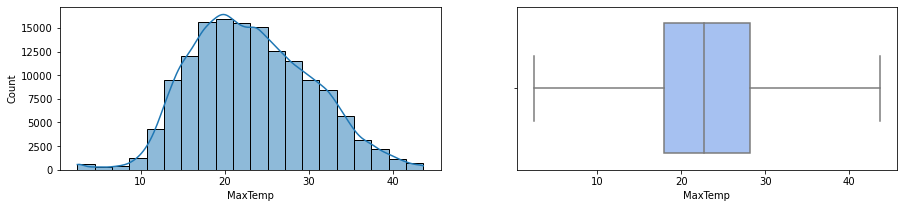

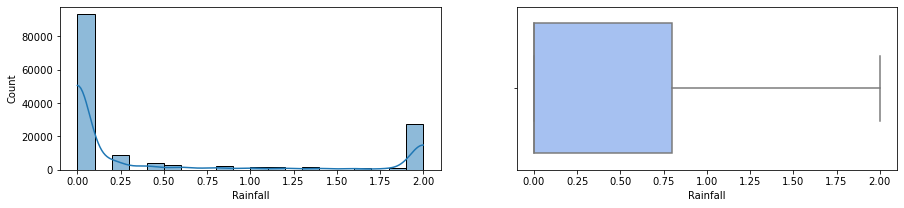

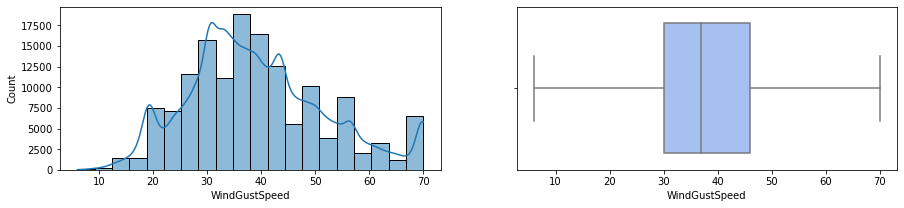

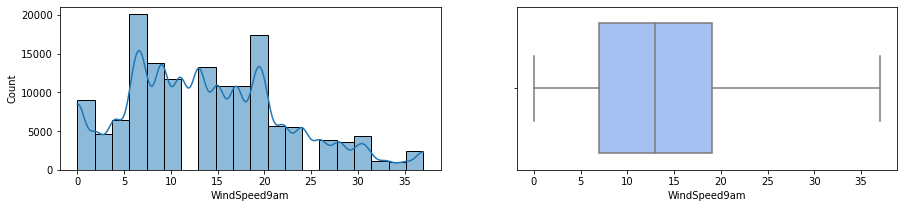

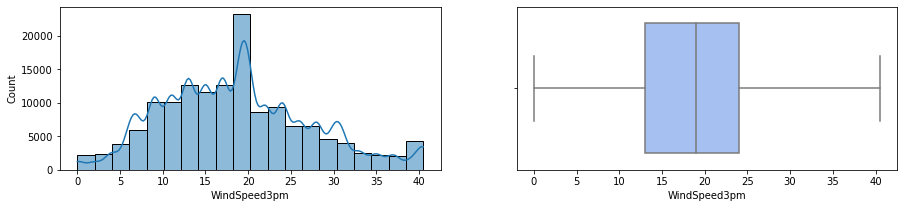

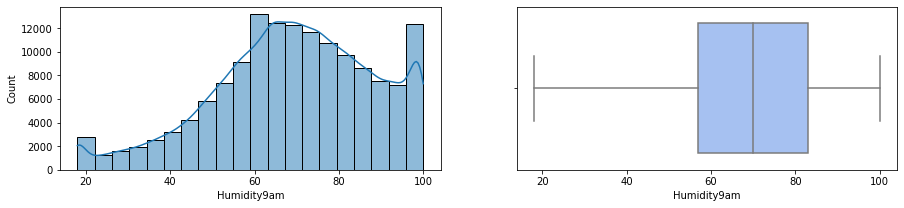

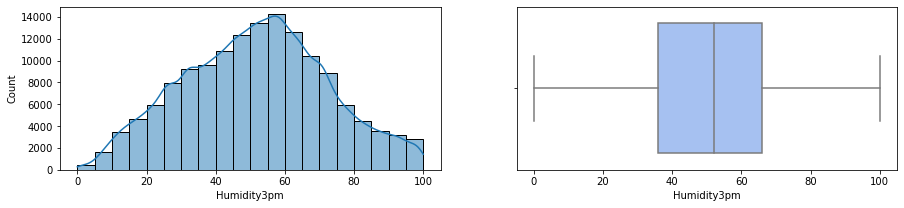

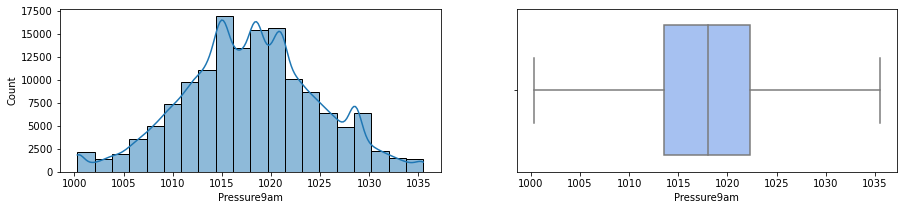

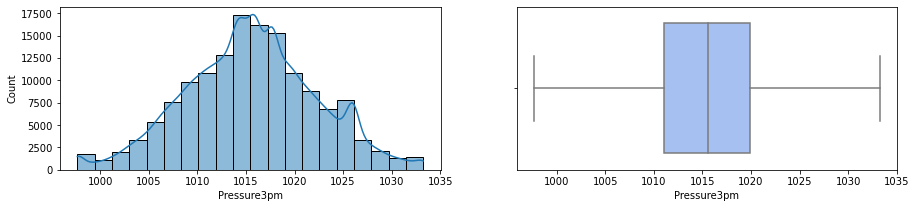

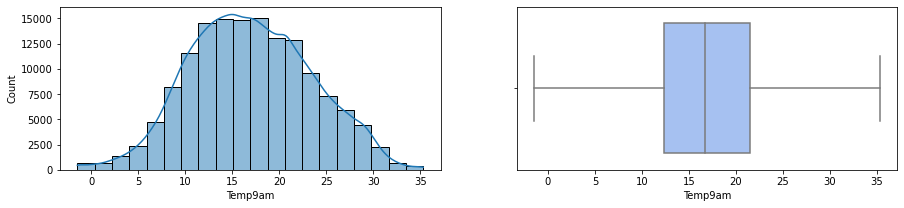

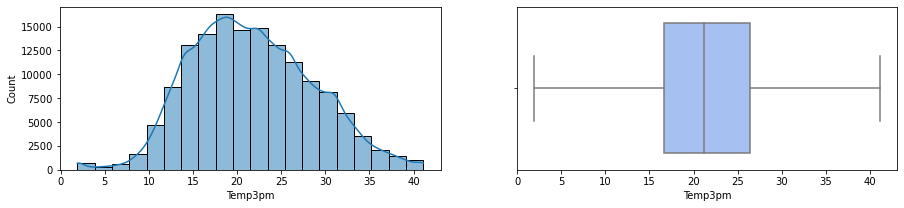

In [210]:
for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df2[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(df2[i], ax = axs[1], color='#99befd', fliersize=1);

Dari visualisasi diatas, dataset sudah tidak memiliki outliers dan memiliki persebaran data yang baik.

## d. Handling Imbalanced
Tahap ini bertujuan melakukan handling terhadap fitur "RainTomorrow" yang mana memiliki pada EDA ditampilkan nilai 0 sangat tinggi dibandingkan nilai 1. Handling yang dilakukan dengan membuat sebuah sample agar nilai menjadi sama rata.

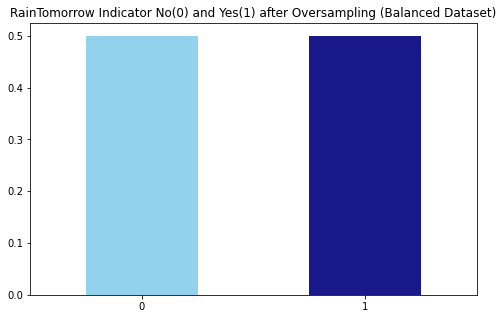

In [211]:
no = df2[df2.RainTomorrow == 0]
yes = df2[df2.RainTomorrow == 1]
tes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, tes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

Dari hasil yang sudah dicoba, handling ini tidak berpengaruh terhadap hasil akurasi sehingga kami hanya menampilkan bahwa sudah melakukan hanndling terhadap imbalanced data.

## e. Save the results of data that have been pre-processed

In [212]:
#df2.to_csv('preprocessed.csv',index=False)

## f. Split Dataset

In [213]:
data = pd.read_csv('datasets/preprocessed.csv')
data.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day
0,21,13.4,22.9,0.6,0,44.0,0,1,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,12,1
1,21,7.4,25.1,0.0,1,44.0,4,2,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,12,2
2,21,12.9,25.7,0.0,2,46.0,0,2,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,12,3
3,21,9.2,28.0,0.0,3,24.0,12,14,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,12,4
4,21,17.5,32.3,1.0,0,41.0,8,11,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,12,5


In [214]:
# spliting training and testing data
from sklearn.model_selection import train_test_split

X = data.drop(['RainTomorrow'], axis = 1)
y = data['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Splitting data dilakukan dengan komposisi (Training 80: Test 20) dan random state = 0. Untuk random_state dengan nilai nol kami pilih, karena sebelumnya kami sempat mencoba menggunakan 27 yang mana berpengaruh terhadap akurasi. Nilai skor akurasi dengan random_state = 0 didapatkan lebih tinggi daripada random_state = 27.

In [215]:
X.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,Month,Day
0,21,13.4,22.9,0.6,0,44.0,0,1,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,12,1
1,21,7.4,25.1,0.0,1,44.0,4,2,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,12,2
2,21,12.9,25.7,0.0,2,46.0,0,2,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,12,3
3,21,9.2,28.0,0.0,3,24.0,12,14,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,12,4
4,21,17.5,32.3,1.0,0,41.0,8,11,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,12,5


In [216]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64

# 8. Modeling and Evaluation
Pada tahap modeling, kami harus memilih algoritma yang tepat agar bisa menyelesaikan masalah sesuai dengan research goal. Research goal kali ini adalah klasifikasi dataset untuk dapat memprediksi hujan. Oleh karena itu, algoritma machine learning yang cocok untuk klasifikasi yaitu tipe supervised learning seperti, logistic regression, naive bayes, knn, svm, dll.

## a. Logistic Regression
Logistic Regression adalah sebuah algoritma klasifikasi untuk mencari hubungan antara fitur (input) diskrit/kontinu dengan probabilitas hasil output diskrit tertentu. Selain itu, algoritma ini mampu dengan baik menangani Outlier Data. Secara umum, cara kerja logistic regression akan mengukur hubungan antara variabel target (yang ingin diprediksi) dan variabel input (fitur yang digunakan) dengan fungsi logistik. Lalu,probabilitas akan dihitung menggunakan fungsi sigmoid untuk mengubah nilai-nilai tadi menjadi 0 atau 1.

**Modeling**

In [217]:
logreg = LogisticRegression(solver='liblinear', random_state = 0)
logreg.fit(X_train, y_train)
 
y_pred = logreg.predict(X_test)

**Evaluation**

In [218]:
print(f'Model accuracy score: {round(accuracy_score(y_test, y_pred) * 100, 2)}%')

Model accuracy score: 83.89%


In [219]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22557
           1       0.72      0.46      0.56      6535

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.73     29092
weighted avg       0.83      0.84      0.83     29092



Dapat kita lihat bahwa nilai akurasi dari model Logistic Regression sebesar 83.89% atau dapat dibulatkan menjadi 84%, yang artinya model cukup baik digunakan untuk memprediksi Hujan di Australia.

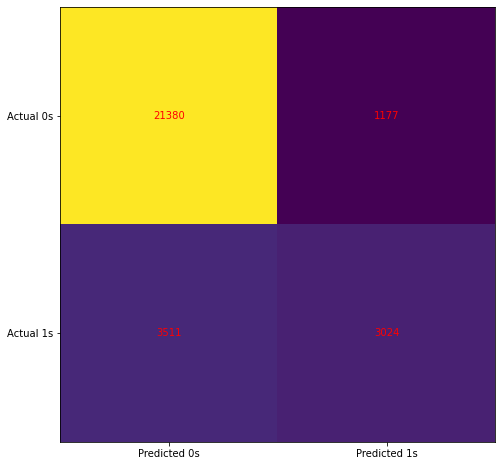

In [220]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='red')
plt.show()

Pada Confusion Matrix menunjukan bahwa terdapat 21380 + 3024 = 24.404 diprediksi benar (sesuai) dan 1177 + 3511 = 4.682 diprediksi tidak benar (tidak sesuai).

Pada kasus ini, dapat kita lihat bahwa terdapat
*   True Positives (Actual Positive:1s and Predict Positive:1s) = 3024
*   True Negatives (Actual Negative:0s and Predict Negative:0s) = 21380
*   False Positives (Actual Negative:0s but Predict Positive:1s) = 1177 (Kesalahan tipe I)
*   False Negatives (Actual Positive:1 but Predict Negative:0) = 3511 (Kesalahan tipe II)

## b. SVM (Support Vector Machines)
Support Vector Machine (SVM) merupakan salah satu metode dalam supervised learning yang biasanya digunakan untuk klasifikasi (seperti Support Vector Classification) dan regresi (Support Vector Regression). Dalam pemodelan klasifikasi, SVM memiliki konsep yang lebih matang dan lebih jelas secara matematis dibandingkan dengan teknik-teknik klasifikasi lainnya. SVM juga dapat mengatasi masalah klasifikasi dan regresi dengan linear maupun non linear.

**Modeling**

In [222]:
svm_model = svm.SVC(kernel = 'linear')
svm_model.fit(X_train,y_train)

SVC(kernel='linear')

In [223]:
pred_svm = svm_model.predict(X_test)

**Evaluation**

In [224]:
print(f'Model accuracy score: {round(accuracy_score(y_test, pred_svm) * 100, 2)}%')

Model accuracy score: 83.64%


In [225]:
# classification report
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     22557
           1       0.72      0.44      0.55      6535

    accuracy                           0.84     29092
   macro avg       0.79      0.70      0.72     29092
weighted avg       0.82      0.84      0.82     29092



Dapat kita lihat bahwa nilai akurasi dari model SVM sebesar 83.64% atau dapat dibulatkan menjadi 84%, yang artinya model cukup baik digunakan untuk memprediksi Hujan di Australia.

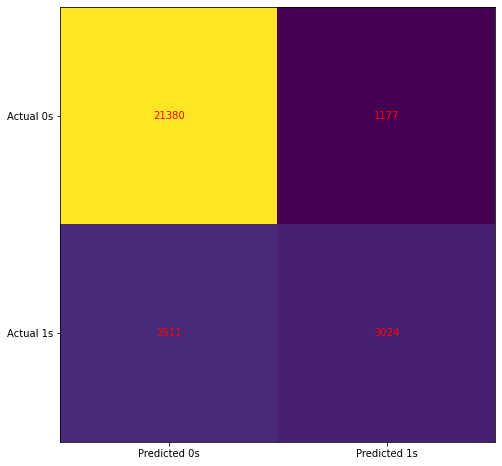

In [226]:
# confusion matrix
cm_svm = confusion_matrix(y_test,pred_svm)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm_svm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='red')
plt.show()

Pada Confusion Matrix menunjukan bahwa terdapat 21380 + 3024 = 24.404 diprediksi benar (sesuai) dan 1177 + 3511 = 4.682 diprediksi tidak benar (tidak sesuai).

Pada kasus ini, dapat kita lihat bahwa terdapat
*   True Positives (Actual Positive:1s and Predict Positive:1s) = 3024
*   True Negatives (Actual Negative:0s and Predict Negative:0s) = 21380
*   False Positives (Actual Negative:0s but Predict Positive:1s) = 1177 (Kesalahan tipe I)
*   False Negatives (Actual Positive:1 but Predict Negative:0) = 3511 (Kesalahan tipe II)

# 9. Save model in pickle file 

In [227]:
#import pickle
#pickle.dump(logreg, open('model.pkl','wb'))

# 10. Model Infrerences
Bagian ini diisi dengan model inference, di mana model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia. Data yang dimaksud bisa berupa data buatan sendiri.

## Percobaan Pertama

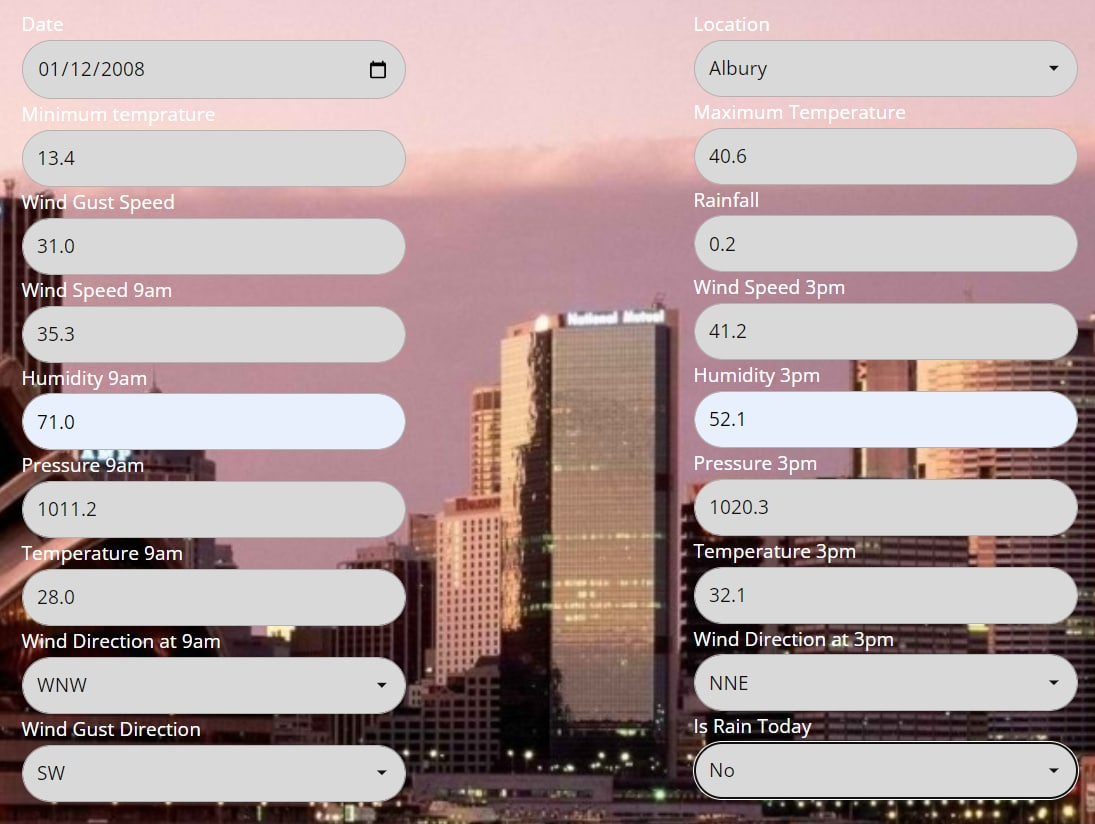

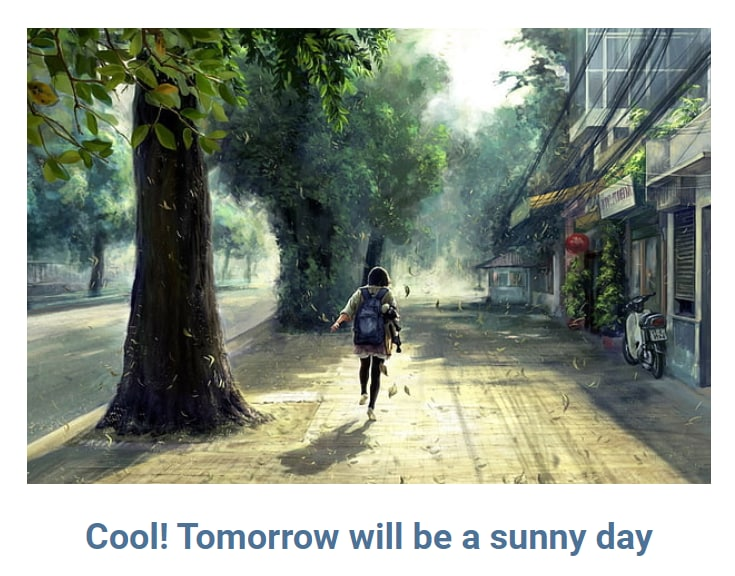

## Percobaan Kedua

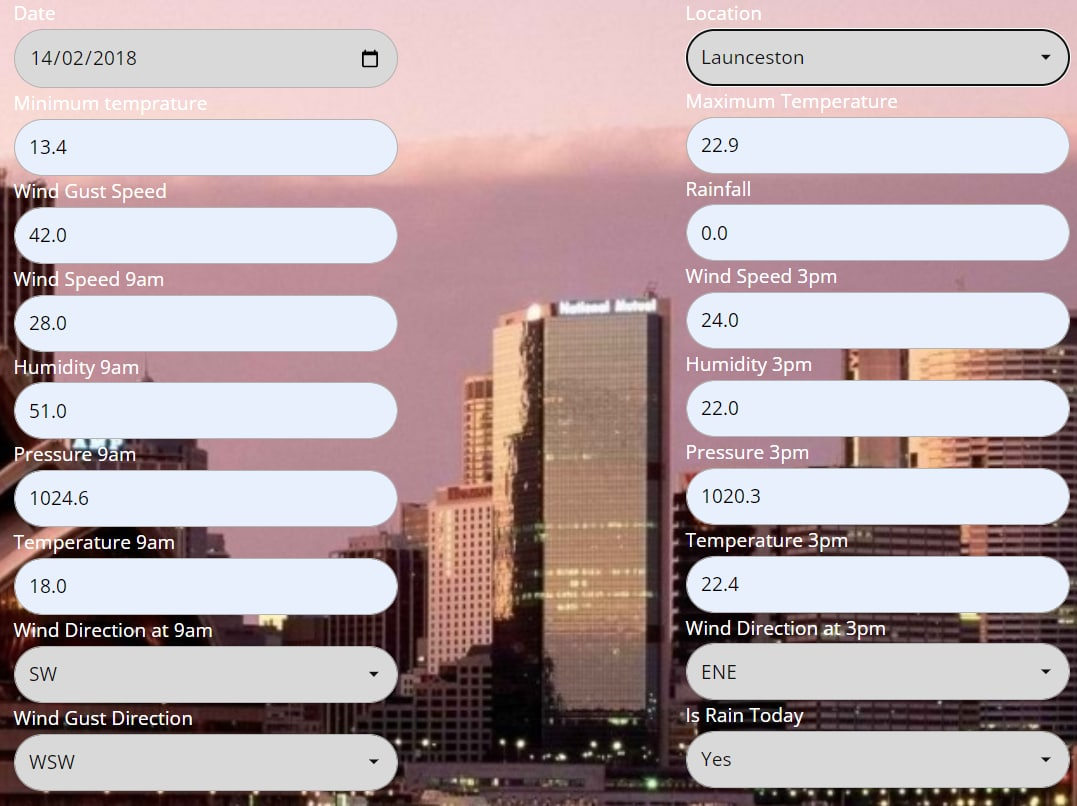

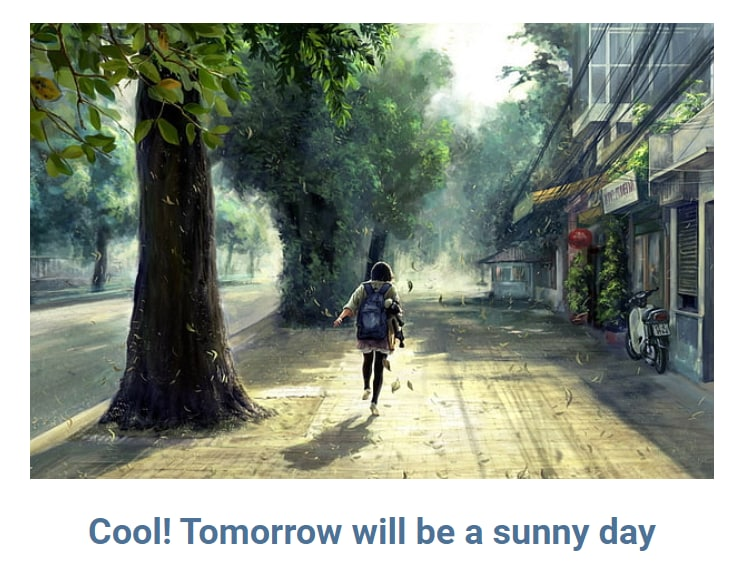

## Percobaan Ketiga

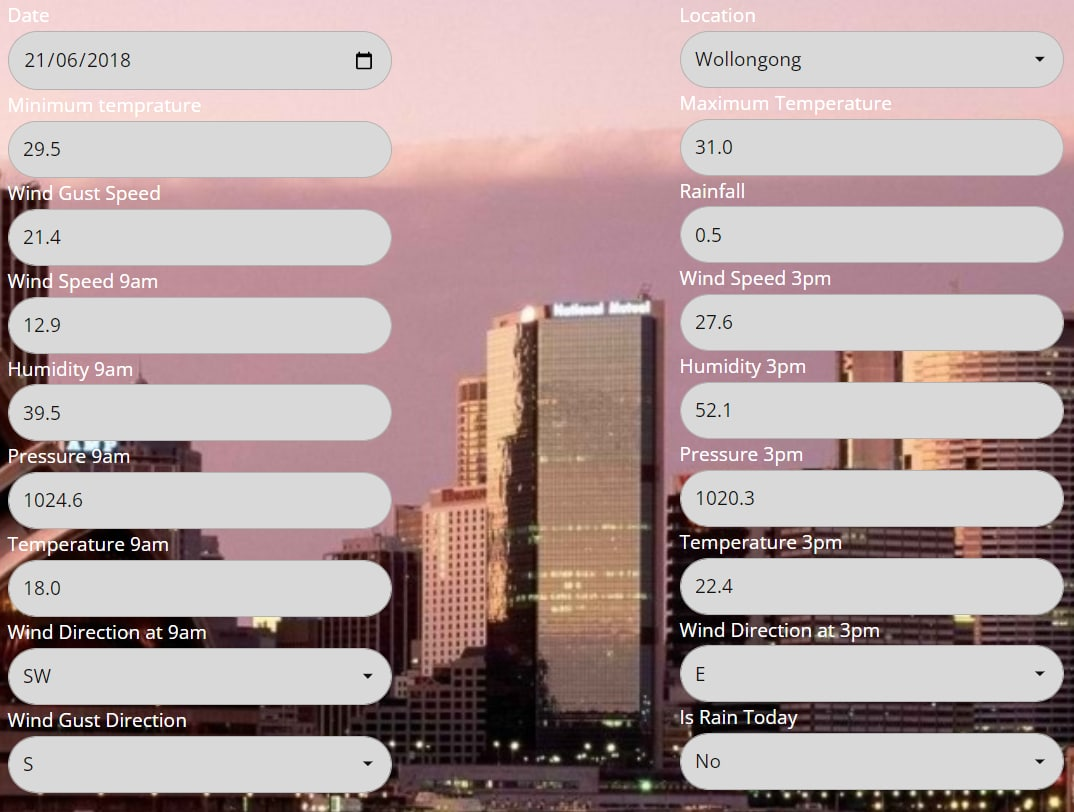

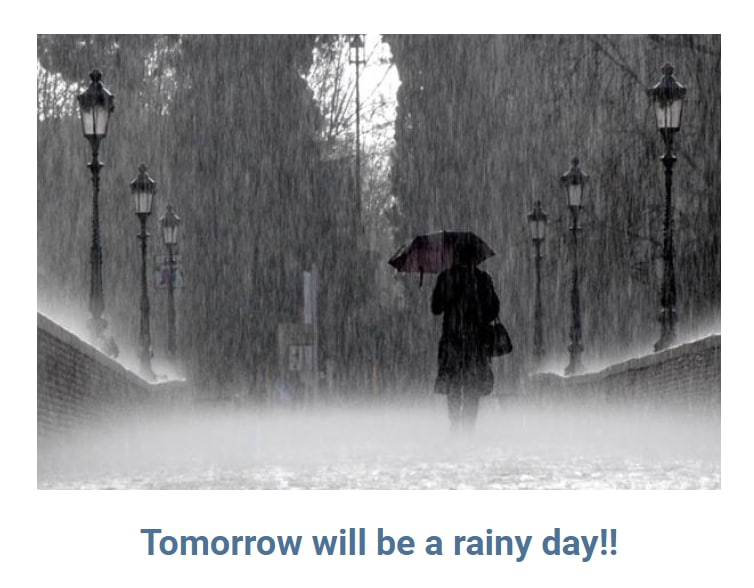

# 11. Conclusion

1. Setelah dilakukan analisis, dapat kit aketahui bahwa nilai akurasi dari masing-masing model yaitu

    *   Logistic Regression Model = 83.89%
    *   SVM Model = 83.64%

Nilai akurasi dari kedua model tidak menunjukan perbedaan yang signifikan. Tapi model Logistic Regression memiliki nilai akurasi yang lebih tinggi sebesar 83.89%, untuk itu model Logistic Regression merupakan model terbaik untuk memprediksi Hujan di Australia. Dapat kita simpulkan pula bahwa baik model Logistic Regression maupun model SVM keduanya condong memprediksi bahwa 'Tidak ada hujan esok hari' daripada 'Hujan esok hari'.

2. Selain itu, kami juga dapat menyimpulkan bahwa dengan melakukan tahap cleaning dan pre-processing (handling outlier dan feature selection) pada dataset dapat menaikkan hasil akurasi.